# Importing Libraries

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import numpy.random

# Importing Dataframes

In [2]:
class_stats = pd.read_csv('Total winrate por torneo.csv') 
hs_classes = ['Paladin','Rogue','Mage','Druid','Demonhunter','Hunter','Priest','Shaman','Warlock','Warrior']

# Initial Data exploration

In [3]:
class_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Paladin winrate      90 non-null     float64
 1   Paladin played       90 non-null     int64  
 2   Rogue winrate        90 non-null     float64
 3   Rogue played         90 non-null     int64  
 4   Mage winrate         90 non-null     float64
 5   Mage played          90 non-null     int64  
 6   Druid winrate        90 non-null     float64
 7   Druid played         90 non-null     int64  
 8   Demonhunter winrate  90 non-null     float64
 9   Demonhunter played   90 non-null     int64  
 10  Hunter winrate       90 non-null     float64
 11  Hunter played        90 non-null     int64  
 12  Priest winrate       90 non-null     float64
 13  Priest played        90 non-null     int64  
 14  Shaman winrate       90 non-null     float64
 15  Shaman played        90 non-null     int64

Here we see that we have no null values and that we have 20 numerical variables , 10 discrete( the amount of games played) and continuos() the win rate)

In [4]:
class_stats.head()

,Paladin winrate,Paladin played,Rogue winrate,Rogue played,Mage winrate,Mage played,Druid winrate,Druid played,Demonhunter winrate,Demonhunter played,Hunter winrate,Hunter played,Priest winrate,Priest played,Shaman winrate,Shaman played,Warlock winrate,Warlock played,Warrior winrate,Warrior played
0,0.569892,93,0.553648,233,0.420290,69,0.510040,249,0.467662,201,0.470588,68,0.524752,101,0.337079,89,0.459259,135,0.558140,172
1,0.468750,128,0.555556,315,0.483660,153,0.547253,455,0.446970,264,0.444444,162,0.520710,338,0.398551,138,0.496063,254,0.496314,407
2,0.496894,161,0.435088,285,0.389313,131,0.610294,408,0.466387,238,0.341880,117,0.607143,252,0.441441,111,0.496403,139,0.484568,324
3,0.468468,111,0.503185,157,0.461538,91,0.551402,321,0.460606,165,0.528736,87,0.579208,202,0.367347,49,0.457143,70,0.443946,223
4,0.470588,119,0.462585,147,0.500000,144,0.519231,312,0.431655,139,0.446154,65,0.566210,219,0.410256,39,0.512195,82,0.520408,196


In [5]:
class_stats.describe()

,Paladin winrate,Paladin played,Rogue winrate,Rogue played,Mage winrate,Mage played,Druid winrate,Druid played,Demonhunter winrate,Demonhunter played,Hunter winrate,Hunter played,Priest winrate,Priest played,Shaman winrate,Shaman played,Warlock winrate,Warlock played,Warrior winrate,Warrior played
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.487143,147.288889,0.500265,325.011111,0.497098,232.200000,0.506554,390.655556,0.506006,294.077778,0.475179,185.633333,0.501695,274.455556,0.436864,51.055556,0.480012,133.600000,0.497596,262.577778
std,0.053711,80.550249,0.027047,119.474175,0.042377,100.320408,0.031909,136.629587,0.036316,105.159614,0.048114,66.736687,0.038898,109.853852,0.088359,28.761070,0.092637,89.373575,0.040717,92.707342
min,0.321429,28.000000,0.430000,135.000000,0.330000,69.000000,0.438298,138.000000,0.415205,121.000000,0.287671,65.000000,0.401961,101.000000,0.178571,7.000000,0.153846,4.000000,0.417323,96.000000
25%,0.455195,91.250000,0.481877,242.750000,0.478645,155.000000,0.485071,285.250000,0.482446,206.000000,0.454233,137.750000,0.475247,199.750000,0.388889,32.000000,0.449391,56.000000,0.466143,190.250000
50%,0.485654,131.000000,0.501196,312.000000,0.500000,218.000000,0.502903,376.000000,0.506513,265.500000,0.477969,179.000000,0.502936,256.500000,0.426786,44.000000,0.501232,124.500000,0.495580,260.500000
75%,0.517183,186.250000,0.515192,385.000000,0.524309,293.750000,0.525689,488.750000,0.530547,361.750000,0.505650,242.000000,0.523963,334.000000,0.500000,62.500000,0.536319,199.250000,0.526098,319.500000
max,0.640000,490.000000,0.572368,698.000000,0.578397,456.000000,0.610294,754.000000,0.570175,544.000000,0.566667,362.000000,0.613861,540.000000,0.677419,149.000000,0.619048,313.000000,0.616352,459.000000


 The std of the winrates is quite solid, which means that most of the values is around the mean, so the kurtosis of the function should be quite small, let's check

In [6]:
class_stats.filter(like='winrate').kurtosis()

Paladin winrate        1.457639
Rogue winrate          0.128797
Mage winrate           2.067622
Druid winrate          0.389084
Demonhunter winrate   -0.235494
Hunter winrate         2.174448
Priest winrate         0.443702
Shaman winrate         0.528670
Warlock winrate        2.930947
Warrior winrate       -0.108804
dtype: float64

Well, we see 3 variables that might have some higher amount of outliers , but for the most part  we should expect pretty light tails

## The question I'll try to answer are the following:
### 1- What are the confidence intervals for the win rates of every deck?
### 2- Do the win rates change significantly in the last tournaments against the whole sample?
### 3- Is there any relation between the number of games between some of the decks?
### 4- Is there a significant better deck to choose either using first 70 or last 20 tournaments?

### 1- Confidence intervals for every deck

In [7]:
#Formula for calculating the confidence interval
def mean_confidence_interval(a, conf=0.95):
    mean, sem, m = np.mean(a), stats.sem(a), stats.t.ppf((1+conf)/2., len(a)-1)
    return mean - m*sem, mean + m*sem

In [8]:
class_colors = {'Paladin':'y','Warrior':'red','Rogue':'grey','Mage':'cyan','Druid':'brown','Demonhunter':'magenta','Hunter':'green','Priest':'white','Shaman':'blue','Warlock':'purple'}

## Distribution Analysis and Confidence interval of means 

Confidence interval in overall tournaments at 95%, the mean of  Paladin is : (0.4679148214498555, 0.49220456902879417)
Confidence interval in last 20 tournaments at 95%, the mean of  Paladin is : (0.48521149582424694, 0.5386574855698886)

Confidence interval in overall tournaments at 95%, the mean of  Rogue is : (0.4963596862992126, 0.5096639069412474)
Confidence interval in last 20 tournaments at 95%, the mean of  Rogue is : (0.48045037374460026, 0.5008525332041713)

Confidence interval in overall tournaments at 95%, the mean of  Mage is : (0.4783869401004943, 0.49895285586910165)
Confidence interval in last 20 tournaments at 95%, the mean of  Mage is : (0.5163384346182232, 0.5368538496457818)

Confidence interval in overall tournaments at 95%, the mean of  Druid is : (0.4977190773161821, 0.5141410214328056)
Confidence interval in last 20 tournaments at 95%, the mean of  Druid is : (0.4987414862029885, 0.518738604864828)

Confidence interval in overall tournaments at 95%, the mean of 

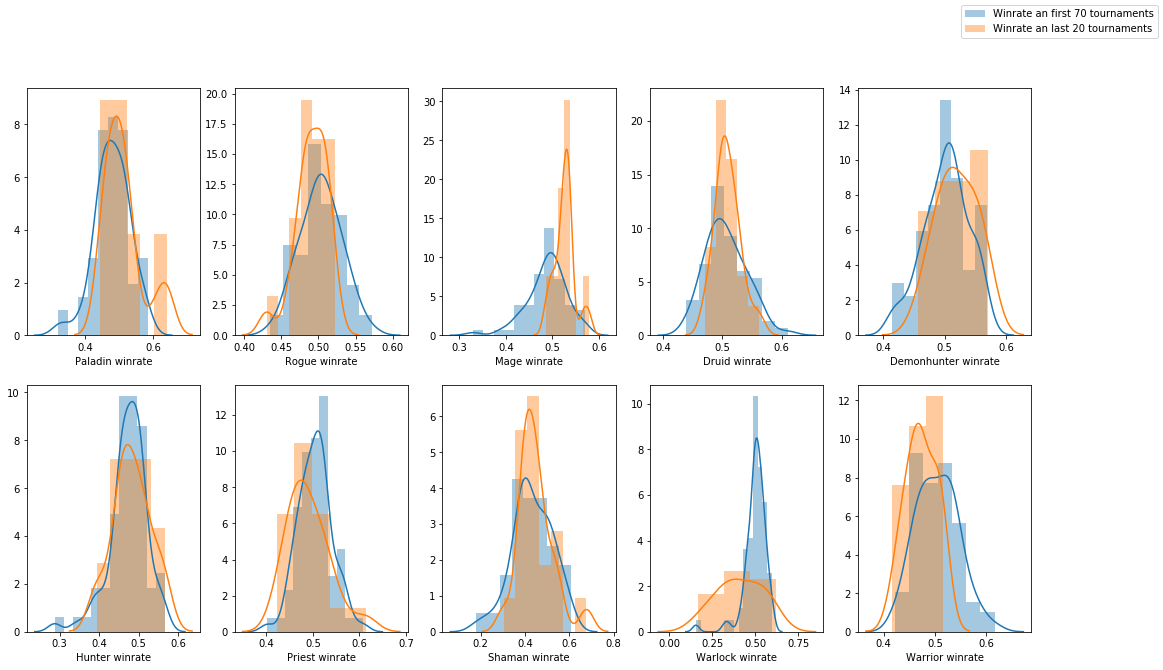

In [9]:
f, axes = plt.subplots(2,5,figsize = [18,10])
best_decks_all = []
best_decks_20 = []
class_stats_first = class_stats[:-20]
class_stats_last_20 = class_stats[-20:]
i=j=0
for hs_class1 in hs_classes:
    data_all = class_stats_first[f'{hs_class1} winrate']
    data_last_20 = class_stats_last_20[f'{hs_class1} winrate']
    sns.distplot(data_all,ax=axes[i][j])
    sns.distplot(data_last_20,ax=axes[i][j])  
    ci_all = mean_confidence_interval(data_all)
    if ci_all[1] > 0.5 and ci_all[0] > 0.48:
        best_decks_all.append(hs_class1)
    ci_last_20 = mean_confidence_interval(data_last_20)
    if ci_last_20[1] > 0.5 and ci_last_20[0] > 0.48:
        best_decks_20.append(hs_class1)
    print(f'Confidence interval in overall tournaments at 95%, the mean of  {hs_class1} is : {ci_all}')
    print(f'Confidence interval in last 20 tournaments at 95%, the mean of  {hs_class1} is : {ci_last_20}\n')
    if j == 4:
        i+=1
        j=0
    else:
        j+=1
f.legend(labels=['Winrate an first 70 tournaments','Winrate an last 20 tournaments'])
plt.show()

## 2 - Do the win rates change significantly in the last tournaments against the whole sample?

It's important to know **why** this kind of test is relevant, in Hearthstone tournaments there are dynamics on the classes chosen, since the tournament sample where we had our data extracted is sequenced over time we can expect some dynamics to shift over time and we want to analyze if the overall deck has got better or worse

Checking if the winrates of first 70 tournaments follow normal distributions

In [11]:
for hs_class in hs_classes:
    result = stats.anderson(class_stats_first[f'{hs_class} winrate'],dist='norm')
    if result.statistic > result.critical_values[2]:
        print(f"\n{hs_class} distribution doesn't follow a normal distribution")
    else:
        print(f"\n{hs_class} distribution  follows a normal distribution")
    print(result)    


Paladin distribution  follows a normal distribution
AndersonResult(statistic=0.3397157268475439, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Rogue distribution  follows a normal distribution
AndersonResult(statistic=0.13920048965370313, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Mage distribution doesn't follow a normal distribution
AndersonResult(statistic=0.7634345328320364, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Druid distribution  follows a normal distribution
AndersonResult(statistic=0.38254566832792136, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Demonhunter distribution  follows a normal distribution
AndersonResult(statistic=0.38355050329312235, critical_values=array([0.548, 0.

Checking if winrates of last 20 tournaments follow normal distribution

In [12]:
for hs_class in hs_classes:
    result = stats.anderson(class_stats_last_20[f'{hs_class} winrate'],dist='norm')
    if result.statistic > result.critical_values[2]:
        print(f"\n{hs_class} sample doesn't follow a normal distribution")
    else:
        print(f"\n{hs_class} sample  follows a normal distribution")
    print(result)


Paladin sample doesn't follow a normal distribution
AndersonResult(statistic=0.9353046858823539, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Rogue sample  follows a normal distribution
AndersonResult(statistic=0.3840762784858711, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Mage sample  follows a normal distribution
AndersonResult(statistic=0.48204178537007536, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Druid sample  follows a normal distribution
AndersonResult(statistic=0.27546179501253576, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Demonhunter sample  follows a normal distribution
AndersonResult(statistic=0.2824734255030137, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), sig

Since almost all the distribution are normal we can use a t test to compare means and assume there's gonna be room for some error on those

In [13]:
for hs_class in hs_classes:
    result = stats.ttest_ind(class_stats[-20:][f'{hs_class} winrate'],class_stats[:-20][f'{hs_class} winrate'])
    print(result)
    if result.pvalue < 0.05 :
        print(f"We reject the null hypothesis, The {hs_class} means between the all tournaments and the 20 last tournament are significatly different\n")
    else:
        print(f"We cannot reject the null hypotheis, therefore The {hs_class} means between the all tournaments and the 20 last tournament are equals on average\n")

Ttest_indResult(statistic=2.4025140711043966, pvalue=0.01838425268971735)
We reject the null hypothesis, The Paladin means between the all tournaments and the 20 last tournament are significatly different

Ttest_indResult(statistic=-1.825895035351836, pvalue=0.07125766964467796)
We cannot reject the null hypotheis, therefore The Rogue means between the all tournaments and the 20 last tournament are equals on average

Ttest_indResult(statistic=3.784804996165458, pvalue=0.000280329725542411)
We reject the null hypothesis, The Mage means between the all tournaments and the 20 last tournament are significatly different

Ttest_indResult(statistic=0.3456037915071296, pvalue=0.7304653069496571)
We cannot reject the null hypotheis, therefore The Druid means between the all tournaments and the 20 last tournament are equals on average

Ttest_indResult(statistic=1.9575419970587529, pvalue=0.053452699622647426)
We cannot reject the null hypotheis, therefore The Demonhunter means between the all to

**We Observe that  4 decks had statistically significant different means when we compared the overall results vs the last 20 results, those were the Warrior, WArlock,Paladin and Mage**
**The mage and paladin improving by a lot, as we can see in the statistic, and the warrior and warlock degrading its mean value as we can also see in the negative statistic result of the ttest**

### 3- Is there any relation between the number of games between some of the decks?

First we plot our data to see the distribution

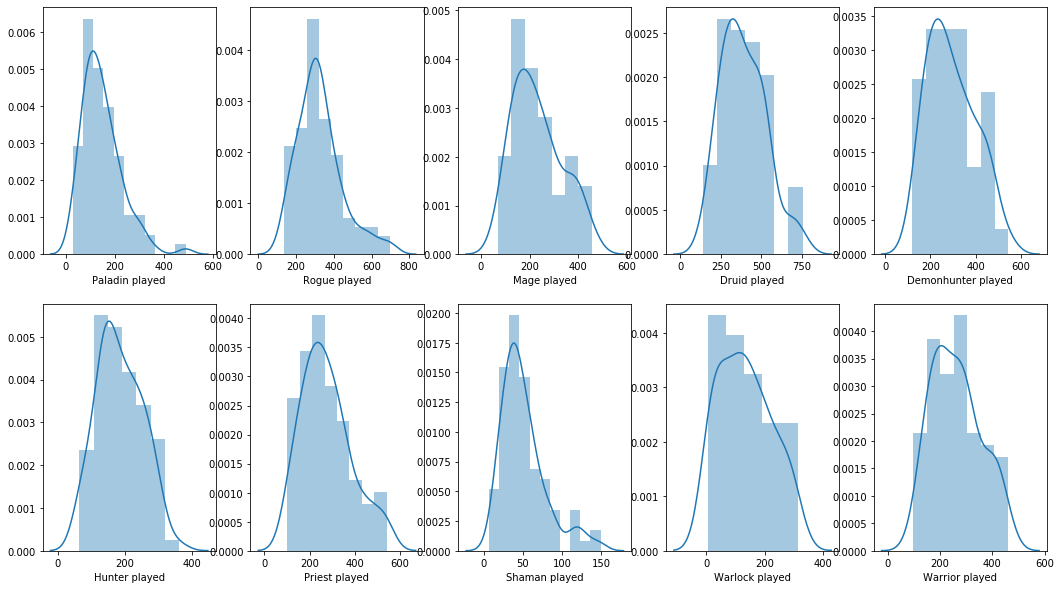

In [14]:
f, axes = plt.subplots(2,5,figsize = [18,10])
i=j=0
for hs_class1 in hs_classes:
    data = class_stats[f'{hs_class1} played']
    sns.distplot(data,ax=axes[i][j])
    ci = mean_confidence_interval(data)
    if j == 4:
        i+=1
        j=0
    else:
        j+=1
    

We check if the distributions are normal

In [15]:
for hs_class in hs_classes:
    result = stats.anderson(class_stats[f'{hs_class} played'],dist='norm')
    if result.statistic > result.critical_values[2]:
        print(f"{hs_class} games played distribution doesn't follow a normal distribution\n")
    else:
        print(f'{hs_class} games played distribution follows a normal distribution\n')

Paladin games played distribution doesn't follow a normal distribution

Rogue games played distribution doesn't follow a normal distribution

Mage games played distribution doesn't follow a normal distribution

Druid games played distribution doesn't follow a normal distribution

Demonhunter games played distribution doesn't follow a normal distribution

Hunter games played distribution follows a normal distribution

Priest games played distribution doesn't follow a normal distribution

Shaman games played distribution doesn't follow a normal distribution

Warlock games played distribution doesn't follow a normal distribution

Warrior games played distribution doesn't follow a normal distribution



Since almost all of the data doesn't follow a normal distribution use a non-parametric test

In [16]:
h1 = []
h0 = []
for hs_class in hs_classes:
    for hs_class2 in hs_classes:
        if hs_class != hs_class2:
            result = stats.spearmanr(class_stats[f'{hs_class} played'],class_stats[f'{hs_class2} played'])
            if(result[1] < 0.05):
                h1.append(f'Correlation between {hs_class} games played and {hs_class2} games played is : {result[0]}, pvalue = {result[1]}')
            else:    
                h0.append(f'Correlation between {hs_class} games played and {hs_class2} games played is : {result[0]}, pvalue = {result[1]}')
                
print('Correlated games played variables:\n')
for s in h1:
    print(s)
print('\nUncorrelated games played variables:\n')
for s in h0:
    print(s)

Correlated games played variables:

Correlation between Paladin games played and Rogue games played is : 0.28151175780484167, pvalue = 0.007189986441881559
Correlation between Paladin games played and Mage games played is : 0.4155971384257205, pvalue = 4.632343499418502e-05
Correlation between Paladin games played and Druid games played is : 0.806446568241425, pvalue = 8.687116224711559e-22
Correlation between Paladin games played and Hunter games played is : 0.23316964341040297, pvalue = 0.026987281758585443
Correlation between Paladin games played and Priest games played is : 0.6722935009959241, pvalue = 4.002472774998778e-13
Correlation between Paladin games played and Shaman games played is : 0.5306365445182113, pvalue = 7.462583592172225e-08
Correlation between Paladin games played and Warlock games played is : 0.35349419223280304, pvalue = 0.0006315026797451476
Correlation between Paladin games played and Warrior games played is : 0.6256632323393431, pvalue = 4.30338536126817e-11

## Distribution analysis and Confidence interval of means on All tournaments

## 4- Is there a deck with significant better win rate than any other? Either in the whole sample or in the las 20 tournaments?

First 70 tournaments

In [17]:
for hs_class in hs_classes:
    result = stats.anderson(class_stats[f'{hs_class} winrate'],dist='norm')
    if result.statistic > result.critical_values[2]:
        print(f"{hs_class} distribution doesn't follow a normal distribution")        
    else:
        print(f'{hs_class} distribution follows a normal distribution')

Paladin distribution follows a normal distribution
Rogue distribution follows a normal distribution
Mage distribution doesn't follow a normal distribution
Druid distribution follows a normal distribution
Demonhunter distribution follows a normal distribution
Hunter distribution doesn't follow a normal distribution
Priest distribution follows a normal distribution
Shaman distribution follows a normal distribution
Warlock distribution doesn't follow a normal distribution
Warrior distribution follows a normal distribution


Last 20 tournaments

In [18]:
for hs_class in hs_classes:
    result = stats.anderson(class_stats[-20:][f'{hs_class} winrate'],dist='norm')
    if result.statistic > result.critical_values[2]:
        print(f"{hs_class} distribution doesn't follow a normal distribution")        
    else:
        print(f'{hs_class} distribution follows a normal distribution')

Paladin distribution doesn't follow a normal distribution
Rogue distribution follows a normal distribution
Mage distribution follows a normal distribution
Druid distribution follows a normal distribution
Demonhunter distribution follows a normal distribution
Hunter distribution follows a normal distribution
Priest distribution follows a normal distribution
Shaman distribution follows a normal distribution
Warlock distribution follows a normal distribution
Warrior distribution follows a normal distribution


We will eliminate from the ecuation the decks that we see have a significant less % win rate and their top confidance interval doesn't go 
higher than 50%

In [19]:
print(f'Best decks all: {best_decks_all},\nBest decks last 20 tournaments:{best_decks_20}')

Best decks all: ['Rogue', 'Druid', 'Demonhunter', 'Priest', 'Warlock', 'Warrior'],
Best decks last 20 tournaments:['Paladin', 'Rogue', 'Mage', 'Druid', 'Demonhunter']


### For first 70 tournaments

In [20]:
c = []
for hs_class in best_decks_all:
    c.append(np.array(class_stats_first[f'{hs_class} winrate']))
result_anova = stats.f_oneway(c[0],c[1],c[2],c[3],c[4],c[5])
if result_anova.pvalue < 0.05:
    print('The winrate means are not the same, therefore there is a deck that is better than the others')
else :
    print('The winrate means are the same, therefore there is NOT a deck that is better than the others')
    
print(result_anova)

The winrate means are the same, therefore there is NOT a deck that is better than the others
F_onewayResult(statistic=0.18500165490879233, pvalue=0.9682124419547301)


### For the last 20 tournaments 

In [21]:
c = []
for hs_class in best_decks_20:
    c.append(np.array(class_stats_last_20[f'{hs_class} winrate']))
result_anova = stats.f_oneway(c[0],c[1],c[2],c[3],c[4])
if result_anova.pvalue < 0.05:
    print('The winrate means are not the same, therefore there is a deck that is better than the others')
else :
    print('The winrate means are the same, therefore there is NOT a deck that is better than the others')
    
print(result_anova)

The winrate means are not the same, therefore there is a deck that is better than the others
F_onewayResult(statistic=3.211501262034509, pvalue=0.016107108396179407)


**From this results we can conclude that if we analyze the data of ALL tournaments there is not a deck that is clearly above the
others, however if we take into account that this decks are not static and change strategies over time and analaize the last 20 tournaments
we can see that there are some decks that are significantly better than the others. If we look at the data. We can see that the one that has 
the higher ranges is MAGE or DEMONHUNTER, although the lower CI of MAGE is higher.
This can be attributed to both RANDOMNESS in the samples due to smaller size or due to the fact that this decks had a higher skillcap(more difficult to play and build properly) and people required some time to figure out the optimal way to build and play them.**